In [42]:
from keras.models import Model,Sequential
from keras.layers import Dense,LeakyReLU,Input
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [7]:
def create_generator():
    model = Sequential()
    model.add(Dense(128,input_dim=100))
    model.add(LeakyReLU(.2))
    model.add(Dense(256))
    model.add(LeakyReLU(.2))
    model.add(Dense(512))
    model.add(LeakyReLU(.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(.2))
    model.add(Dense(784,activation="sigmoid"))
    
    model.compile(optimizer="adam",loss="binary_crossentropy")
    
    return model

In [9]:
gen = create_generator()


In [11]:
gen.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               12928     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              525312    
__________

In [17]:
def create_discriminator():
    model = Sequential()
    
    model.add(Dense(512,input_dim=784,activation="tanh"))
    
    model.add(Dense(256,activation="tanh"))
    
    model.add(Dense(128,activation="tanh"))
    
    model.add(Dense(64,activation="tanh"))
    
    model.add(Dense(1,activation="sigmoid"))
    
    model.compile(optimizer="adam",loss="binary_crossentropy")
    
    return model

In [18]:
dis = create_discriminator()

In [19]:
dis.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 574,465
Trainable params: 574,465
Non-trainable params: 0
_________________________________________________________________


In [31]:
def create_gan(generator,discriminator):
    #functional api
    gan_input = Input((100,))
    x = generator(gan_input)
    gan_output = discriminator(x)

    gan = Model(inputs=[gan_input],outputs=[gan_output])
    
    return gan

In [33]:
generator = create_generator()
discriminator = create_discriminator()

gan = create_gan(generator,discriminator)

In [34]:
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_17 (Sequential)   (None, 784)               1506448   
_________________________________________________________________
sequential_18 (Sequential)   (None, 1)                 574465    
Total params: 2,080,913
Trainable params: 2,080,913
Non-trainable params: 0
_________________________________________________________________


In [65]:
gan.compile(optimizer="adam",loss="binary_crossentropy")

In [35]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [40]:
real = data[:,2:] / 256

In [41]:
np.max(real)

0.99609375

In [52]:
noise = np.random.normal(size=[32,100])

In [49]:
batch =np.array(random.choices(real,k=32))

In [51]:
batch.shape

(32, 784)

In [55]:
noise.shape

(32, 100)

In [60]:
np.vstack([np.zeros((32,1)),np.ones((32,1))])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [58]:
np.hstack([np.zeros((32,)),np.ones((32,))])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [70]:
for e in range(1000):
    noise = np.random.normal(size=[32,100])
    batch =np.array(random.choices(real,k=32))
    
    fake = generator.predict_on_batch(noise)
    total = np.vstack([fake,batch])
    y = np.vstack([np.zeros((32,1)),np.ones((32,1))])
    
    discriminator.trainable = True
    discriminator.fit(total,y,verbose=0)
    
    discriminator.trainable = False
    
    gan.fit(noise,np.ones((32,1)),verbose=0)
    
    print(e)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [71]:
out = generator.predict(noise)

c:\users\gippy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


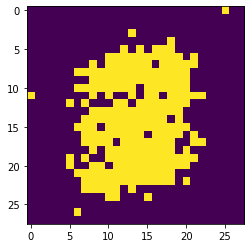

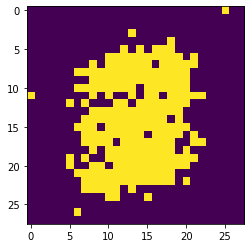

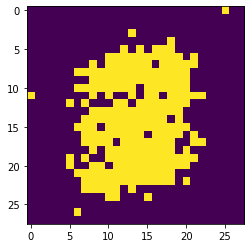

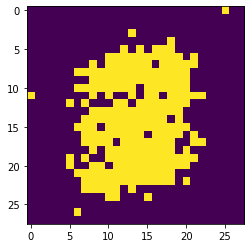

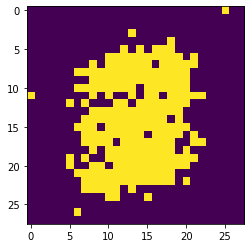

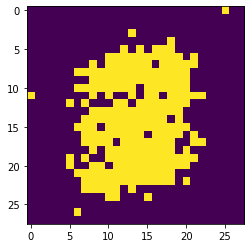

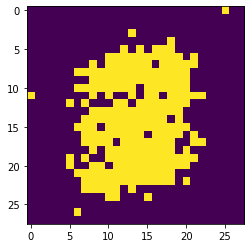

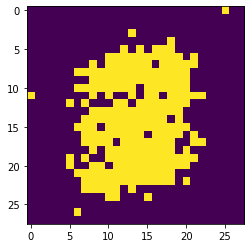

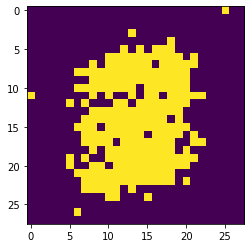

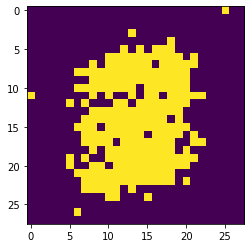

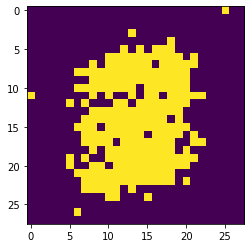

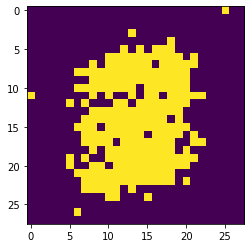

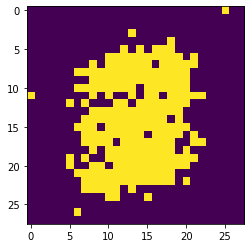

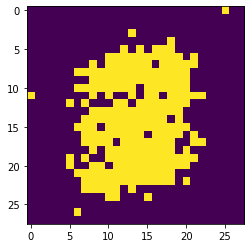

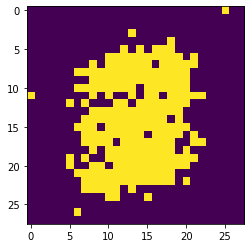

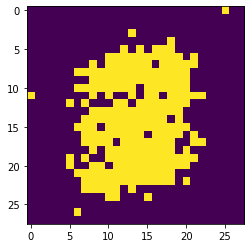

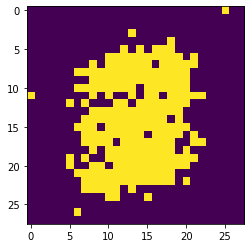

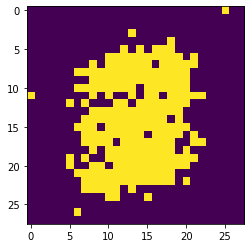

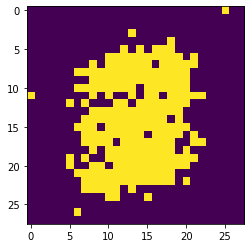

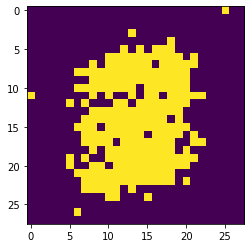

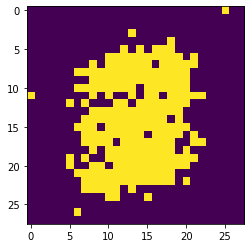

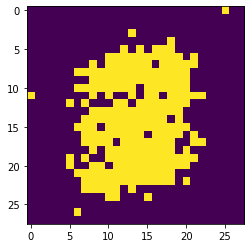

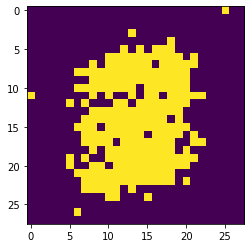

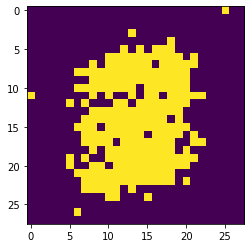

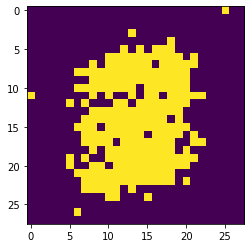

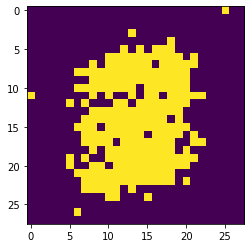

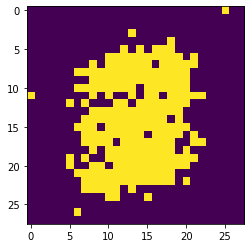

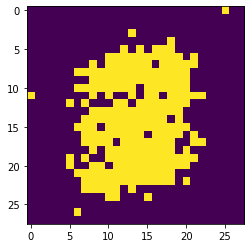

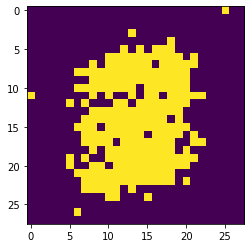

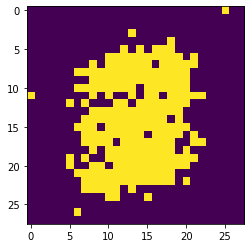

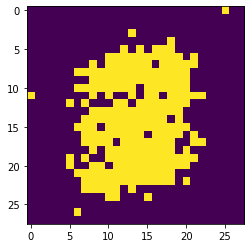

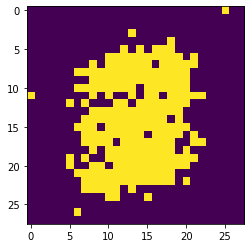

In [72]:
for item in out:
    plt.figure()
    plt.imshow(item.reshape(28,28))